In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import pymongo
from pymongo import MongoClient

In [2]:
# Set up the DataBase Connection
client = MongoClient()
db = client.SpeedTest

In [3]:
posts = db.post.find()

In [4]:
# for post in posts:
#     res = pprint.pprint('{0}, {1}, {2}, {3}'.format(post['localTime'], 
#         post['download'],post['upload'],post['ping']))

In [5]:
db_list = list(posts)

In [6]:
db_df = pd.DataFrame(db_list)
len(db_df)

77

In [7]:
clean_df = db_df.drop(db_df.tail(3).index)
clean_df = clean_df.drop(columns=['_id','timeStamp'])

In [8]:
clean_df = clean_df.set_index(pd.DatetimeIndex(clean_df['localTime'])).drop(columns='localTime')

In [9]:
sorted_df = clean_df.groupby([clean_df.index.day ,clean_df.index.hour]).mean()

In [10]:
sorted_df

download       ping     upload
localTime localTime                                 
10        12         65.344468  16.632667  20.449267
          13         66.189897  15.652750  20.024543
          14         81.098625  21.972500  18.835570
          15         64.320798  15.761000  18.241255
          16         66.316131  17.150400  20.913376
          17         64.516365  16.764750  21.338887
          18         66.113624  16.239250  21.364131
          19         88.281454  30.822500  11.811240
          20         83.648311  25.788250  14.408955
          21         80.113548  16.224500  19.894686
          22         63.712783  16.446750  20.834971
          23         64.386569  16.884000  20.653290
11        0          74.337939  15.933250  20.891138
          1          74.724297  16.764750  21.053939
          2          77.782134  18.258500  21.033766
          3          76.585785  15.686000  21.185391
          4          73.647860  17.060500  19.257284
          5          67.705702  16.829750  21.083522
          6          65.418774  17.034750  19.927827

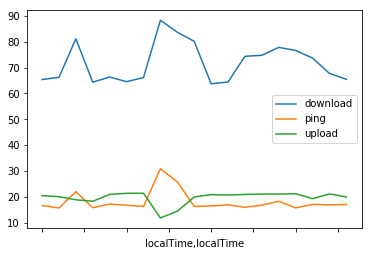

In [11]:
sorted_df.plot()